In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from tqdm import tqdm

In [2]:
csv_format = "celebA/csv/230720/celebA_anno_mixed10000_{}.csv"

save_format = "celeba_crop_224_{}.h5"
fail_txt = "/celeba_crop_224_fail.txt"

In [3]:
tv = 'train'
csv_path = csv_format.format(tv)
df = pd.read_csv(csv_path)

In [4]:
df

,filename,No_Beard,Goatee,Mustache,Smiling,Eyeglasses,Wearing_Lipstick,Wearing_Hat,Wearing_Earrings,Wearing_Necklace,Wearing_Necktie,Beard
0,000001.jpg,1,0,0,1,0,1,0,1,0,0,0
1,000002.jpg,1,0,0,1,0,0,0,0,0,0,0
2,000004.jpg,1,0,0,0,0,1,0,1,1,0,0
3,000005.jpg,1,0,0,0,0,1,0,0,0,0,0
4,000009.jpg,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
149219,071450.jpg,1,0,0,0,0,0,0,0,0,0,0
149220,071455.jpg,1,0,0,0,0,0,0,0,0,0,0
149221,071477.jpg,1,0,0,0,0,0,0,0,0,0,0
149222,071488.jpg,1,0,0,0,0,0,0,0,0,0,0


In [5]:
align_base = "celebA/Img/img_crop224_celeba_scrfd/"

In [6]:
save_path = save_format.format(tv)

In [7]:
# label list modify
label_list = list(df.keys())
print(label_list)
del label_list[1]
del label_list[1]
del label_list[1]

label_list = [label_list[-1],*label_list[1:-1]]

['filename', 'No_Beard', 'Goatee', 'Mustache', 'Smiling', 'Eyeglasses', 'Wearing_Lipstick', 'Wearing_Hat', 'Wearing_Earrings', 'Wearing_Necklace', 'Wearing_Necktie', 'Beard']


In [9]:
label_list

['Beard',
 'Smiling',
 'Eyeglasses',
 'Wearing_Lipstick',
 'Wearing_Hat',
 'Wearing_Earrings',
 'Wearing_Necklace',
 'Wearing_Necktie']

In [10]:
for val in tqdm(df.values):
    img_path = os.path.join(align_base,val[0])
    img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    break

  0%|          | 0/149224 [00:00<?, ?it/s]


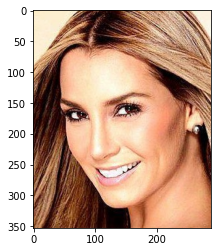

In [11]:
plt.imshow(img)

In [50]:
save_images=[]
save_labels=[]

for val in tqdm(df.values):
    img_path = os.path.join(align_base,val[0])
    img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    
    save_images.append(img)
    save_labels.append([val[-1],*val[4:-1]])


  0%|          | 0/133925 [00:00<?, ?it/s]


In [ ]:
dt = h5py.special_dtype(vlen=str)

hf = h5py.File(save_path,'w')
hf.create_dataset('images', data=np.array(save_images,dtype=np.uint8))
hf.create_dataset('labels',data=np.array(save_labels,dtype=np.uint8))
hf.create_dataset('label_list',data=np.array(label_list,dtype=dt))

# hf.create_dataset('beard', data=np.array(save_beard,dtype=np.uint8))
# hf.create_dataset('eyeglasses', data=np.array(save_eye,dtype=np.uint8))
# hf.create_dataset('lipstick', data=np.array(save_lip,dtype=np.uint8))
# hf.create_dataset('hat', data=np.array(save_hat,dtype=np.uint8))
# hf.create_dataset('earrings', data=np.array(save_ear,dtype=np.uint8))
# hf.create_dataset('necklace', data=np.array(save_lace,dtype=np.uint8))
# hf.create_dataset('necktie', data=np.array(save_tie,dtype=np.uint8))
hf.close()

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from tqdm import tqdm

In [ ]:
csv_format = "celebA/csv/230720/celebA_anno_mixed10000_{}.csv"
save_format = "celeba_crop_224_{}.h5"
fail_txt = "celeba_crop_224_fail_{}.txt"

align_base = "celebA/Img/img_crop224_celeba_scrfd/"

In [ ]:
for tv in ['train']:#,['train','val','test']:
    with open(fail_txt.format(tv),'w') as f:
        csv_path = csv_format.format(tv)
        df = pd.read_csv(csv_path)

        save_path = save_format.format(tv)

        label_list = list(df.keys())
        del label_list[1]
        del label_list[1]
        del label_list[1]

        label_list = [label_list[-1],*label_list[1:-1]]

        save_images=[]
        save_labels=[]
        
        c=0
        clb=0
        for val in tqdm(df.values):
            img_path = os.path.join(align_base,val[0])
            if not os.path.exists(img_path):
                continue
            else:
                c+=1

In [ ]:
fail_list =[]
for tv in ['train']:#,['train','val','test']:
    with open(fail_txt.format(tv),'w') as f:
        csv_path = csv_format.format(tv)
        df = pd.read_csv(csv_path)

        save_path = save_format.format(tv)

        label_list = list(df.keys())
        del label_list[1]
        del label_list[1]
        del label_list[1]

        label_list = [label_list[-1],*label_list[1:-1]]

        save_images=[]
        save_labels=[]

        for val in tqdm(df.values):
            img_path = os.path.join(align_base,val[0])
            if not os.path.exists(img_path):
                fail_list.append(img_path)
                f.writelines(img_path+"\n")
                continue
            img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)

            save_images.append(img)
            save_labels.append([val[-1],*val[4:-1]])

        dt = h5py.special_dtype(vlen=str)

        hf = h5py.File(save_path,'w')
        hf.create_dataset('images', data=np.array(save_images,dtype=np.uint8))
        hf.create_dataset('labels',data=np.array(save_labels,dtype=np.uint8))
        hf.create_dataset('label_list',data=np.array(label_list,dtype=dt))
        hf.close()

 50%|████▉     | 74544/149224 [2:05:30<2:06:22,  9.85it/s]

In [ ]:
# h5py check

In [77]:
hf = h5py.File("celebA/h5/230720/celeba_224_train.h5",'r')

In [78]:
hf.keys()

<KeysViewHDF5 ['images', 'label_list', 'labels']>

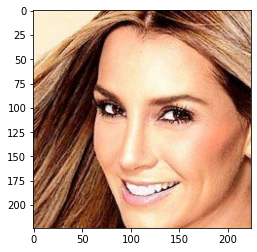

In [79]:
plt.imshow(hf['images'][0])

In [85]:
label_list = [lb.decode('utf-8') for lb in hf['label_list']]
print(label_list)

['Beard', 'Smiling', 'Eyeglasses', 'Wearing_Lipstick', 'Wearing_Hat', 'Wearing_Earrings', 'Wearing_Necklace', 'Wearing_Necktie']


In [84]:
print(hf['labels'][0])

[0 1 0 1 0 1 0 0]
